### Objective

In this exercise, we will engage in classification of images of handwritten digits ‘0’ and ‘1’ using
k-nearest neighbor (k-NN) classification.

# Training Dataset

In [2]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)
# Labeled training set
training_images = images[:300]
training_labels = labels[:300]
# Labeled test set
test_images = images[300:]
test_labels = labels[300:]
print ("Training images",training_images.shape)
print ('Training labels',training_labels.shape)
print ('Test images',test_images.shape)
print ('Test labels',test_labels.shape)

Training images (300, 64)
Training labels (300,)
Test images (60, 64)
Test labels (60,)


# k-NN Classification Using 2-D Features

1. Carry out principal component analysis (PCA) of images in the training set and compute two-dimensional PCA features of training images.

In [4]:
import numpy as np
import numpy.linalg as la
#find mean of data
mean_i = np.mean(training_images,axis=0)
# center data
I_c = training_images -mean_i;
I_c = I_c.transpose() # make mxn dim
print("Image data matrix shape is: ",I_c.shape)
U,S,VT = la.svd(I_c)
#print(U.shape)
U2d = U[:,:2]
features = U2d.transpose().dot(I_c)
print("Features shape",features.shape)

Image data matrix shape is:  (64, 300)
Features shape (2, 300)


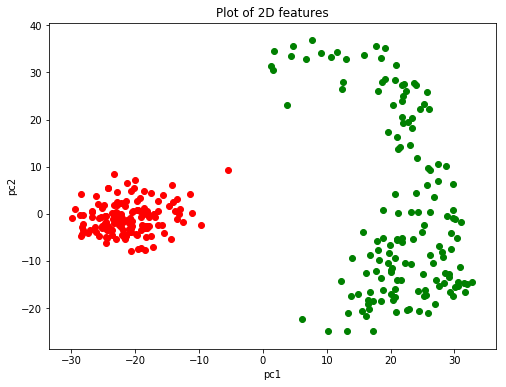

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

pts = features.transpose()
x,y = zip(*pts)
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

for i in range(pts.shape[0]):
    if (training_labels[i]==0):
        ax.scatter(x[i], y[i], c='r', marker='o')
    else:
        ax.scatter(x[i], y[i], c='g', marker='o')
ax.set_title("Plot of 2D features")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

2. Classify each image in the test set by first transforming it to the two-dimensional PCA domain using the principal components obtained above and then using k-NN classification with k = 5 and the distance metric being $|| · ||_2$.

In [38]:
k = 5
T = test_images.transpose()
features_test = U2d.transpose().dot(T)
#print (features_test.shape)

diff = np.zeros(shape=(T.shape[1],features.shape[1]))
for i in range(T.shape[1]):
   # h = MinHeap()
    for j in range(features.shape[1]):
        diff[i][j] = la.norm(features_test[:,i]-features[:,j],2)
      
## find smallest distance k indices
ind = np.argsort(diff, axis=1)[:,:k]

#print(ind.shape)
newlabels = np.zeros(T.shape[1]);
for i in range(T.shape[1]):
    count0 = 0
    count1 = 0
    for j in range(k):
        if(training_labels[ind[i,j]]==0):
            count0 = count0 +1
        else:
            count1 = count1 +1
    if (count0>count1):
        newlabels[i] = 0;
    else:
        newlabels[i] = 1;

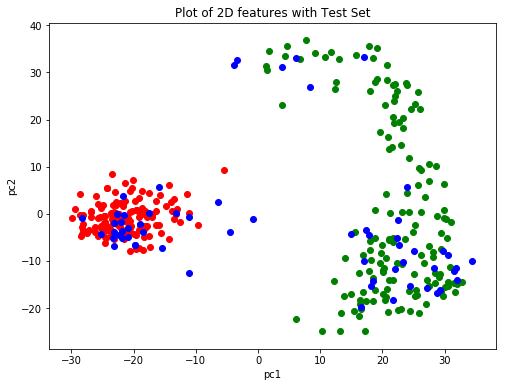

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

pts = features.transpose()
x,y = zip(*pts)
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

for i in range(pts.shape[0]):
    if (training_labels[i]==0):
        ax.scatter(x[i], y[i], c='r', marker='o')
    else:
        ax.scatter(x[i], y[i], c='g', marker='o')

pts = features_test.transpose()
x,y = zip(*pts)
errorct = 0
for i in range(pts.shape[0]):
    if (newlabels[i]==test_labels[i]):
        ax.scatter(x[i], y[i], c='b', marker='o')
    else:
        errorct = errorct+1
        ax.scatter(x[i], y[i], c='k', marker='o')
ax.set_title("Plot of 2D features with Test Set")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

In [61]:
avgerror = errorct/test_labels.shape[0]
print ("Number of errors is: ",errorct)
print("The average classification error is: ", avgerror)

Number of errors is:  0
The average classification error is:  0.0


# k-NN Classification Using Higher-dimensional Features

1. Carry out PCA of images in the training set and compute r-dimensional PCA features of training images such that the top-r principal components capture 95% of variation within the training data.

In [3]:
import numpy as np
import numpy.linalg as la
#find mean of data
mean_i = np.mean(training_images,axis=0)
# center data
I_c = training_images -mean_i;
I_c = I_c.transpose() # make mxn dim
print("Image data matrix shape is: ",I_c.shape)
U,S,VT = la.svd(I_c)
#finding smallest k to encompass 95% of data
s_sum = 0
fnorm = la.norm(I_c)**2

r = 0
for i in range(S.shape[0]):
    s_sum = s_sum + S[i]**2
    t = s_sum/fnorm
    if(t >= 0.95):
        r = i
        break
#top k principal components of Xbar

print("r is: ",r)
Urd = U[:,:r]
features = Urd.transpose().dot(I_c)
print("Features shape is: ",features.shape)

Image data matrix shape is:  (64, 300)
r is:  18
Features shape is:  (18, 300)


In [5]:
def test_class(k):
    T = test_images - mean_i;
    T = T.transpose()
    features_test = Urd.transpose().dot(T)
    #print ("Test set in PCA domain: ",features_test.shape)

    diff = np.zeros(shape=(T.shape[1],features.shape[1]))
    for i in range(T.shape[1]):
        for j in range(features.shape[1]):
            diff[i][j] = la.norm(features_test[:,i]-features[:,j],2)
    #print(diff.shape)
    ## find smallest distance k indices
    ind = np.argsort(diff, axis=1)[:,:k]
    #print(ind.shape)
    newlabels = np.zeros(T.shape[1]);
    errorct = 0
    for i in range(T.shape[1]):
        count0 = 0
        count1 = 0
        label = 0
        for j in range(k):
            if(training_labels[ind[i,j]]==0):
                count0 = count0 +1
            else:
                count1 = count1 +1
        if (count0>count1):
            #newlabels[i] = 0;
            label = 0
        else:
            #newlabels[i] = 1;
            label = 1
        if (label != test_labels[i]):
            errorct = errorct + 1
    return errorct, errorct/T.shape[1];
ka = [1,3,5,7,9]
error = np.zeros(shape=(len(ka),))
for i in range(len(ka)):
    ec, e = test_class(ka[i]);
    error[i] = e
    print (f"The error count for k={ka[i]} is {ec}\n and the average classification error is {e}\n")

The error count for k=1 is 0
 and the average classification error is 0.0

The error count for k=3 is 0
 and the average classification error is 0.0

The error count for k=5 is 0
 and the average classification error is 0.0

The error count for k=7 is 0
 and the average classification error is 0.0

The error count for k=9 is 0
 and the average classification error is 0.0



Text(0.5, 1.0, 'Average classification error as fcn of k')

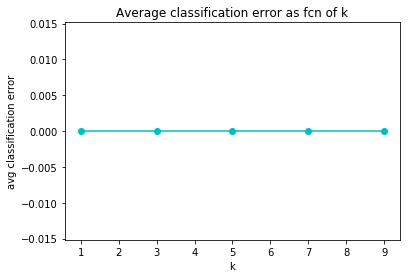

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(ka,error,c='c',marker='o')
ax.plot(ka,error,c='c')
ax.set_xlabel('k')
ax.set_ylabel('avg classification error')
ax.set_title('Average classification error as fcn of k')

Since there are no errors in the labeling of test images, there is no way to tell which k is best for k-NN classification of digits 0 and 1.